In [61]:
#Import Packages & Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler



In [62]:
titanicdf = pd.read_csv(r'train.csv')
print(titanicdf.keys())
print(titanicdf.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)


## Exploratory Data Analysis, descriptive statistics, binning, & many many pivots

### Less comments in this process, skip to feature engineering for processing / cleaning highlights

In [63]:
titanicdf[titanicdf['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [64]:
titanicdf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
titanicdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
titanicdf.pivot_table('Survived', ['Sex'], 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [67]:
titanicdf.pivot_table('Survived', ['Sex','SibSp'], 'Pclass', fill_value = 0)

Pclass               1         2         3
Sex    SibSp                              
female 0      0.979592  0.931818  0.592593
       1      0.950000  0.892857  0.447368
       2      1.000000  1.000000  0.571429
       3      1.000000  1.000000  0.125000
       4      0.000000  0.000000  0.333333
       5      0.000000  0.000000  0.000000
       8      0.000000  0.000000  0.000000
male   0      0.329545  0.118421  0.129630
       1      0.483871  0.259259  0.222222
       2      0.500000  0.200000  0.125000
       3      0.000000  0.000000  0.000000
       4      0.000000  0.000000  0.083333
       5      0.000000  0.000000  0.000000
       8      0.000000  0.000000  0.000000

In [68]:
titanicdf.pivot_table('Survived', ['Sex','Parch'], 'Pclass', fill_value = 0)

Pclass               1         2         3
Sex    Parch                              
female 0      0.984375  0.888889  0.588235
       1      1.000000  0.944444  0.480000
       2      0.846154  1.000000  0.320000
       3      0.000000  1.000000  0.500000
       4      0.000000  0.000000  0.000000
       5      0.000000  0.000000  0.250000
       6      0.000000  0.000000  0.000000
male   0      0.363636  0.089888  0.121622
       1      0.285714  0.500000  0.266667
       2      0.625000  0.400000  0.166667
       3      0.000000  0.000000  0.000000
       4      0.000000  0.000000  0.000000
       5      0.000000  0.000000  0.000000

In [69]:
titanicdf['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [70]:
agebins = pd.cut(titanicdf['Age'], [0, 18, 80])

agebins

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: Age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [71]:
titanicdf.pivot_table('Survived', ['Sex', agebins], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [72]:
farebins = pd.cut(titanicdf['Fare'], 2)

titanicdf.pivot_table('Survived', ['Sex', farebins], 'Pclass')

Pclass                            1         2         3
Sex    Fare                                            
female (-0.512, 256.165]   0.966292  0.921053  0.500000
       (256.165, 512.329]  1.000000       NaN       NaN
male   (-0.512, 256.165]   0.364407  0.157407  0.135447
       (256.165, 512.329]  0.500000       NaN       NaN

In [73]:
titanicdf.pivot_table(index = 'Sex', columns= 'Pclass', aggfunc={'Survived':sum, 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [74]:
cabinsurvivaldf = titanicdf.loc[:, ['Survived','Sex','Cabin']].dropna()

cabinsurvivaldf['Cabin'] = cabinsurvivaldf['Cabin'].str.get(0)

cabinsurvivaldf


,Survived,Sex,Cabin
1,1,female,C
3,1,female,C
6,0,male,E
10,1,female,G
11,1,female,C
...,...,...,...
871,1,female,D
872,0,male,B
879,1,female,C
887,1,female,B


In [75]:
cabinsurvivaldf.pivot_table('Survived', 'Cabin')

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [76]:
cabinsurvivaldf.groupby('Cabin').count() #Figuring Out Cabin Areas

,Survived,Sex
Cabin,,
A,15,15
B,47,47
C,59,59
D,33,33
E,32,32
F,13,13
G,4,4
T,1,1


In [77]:
titanicdf.loc[:].corr(numeric_only= True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


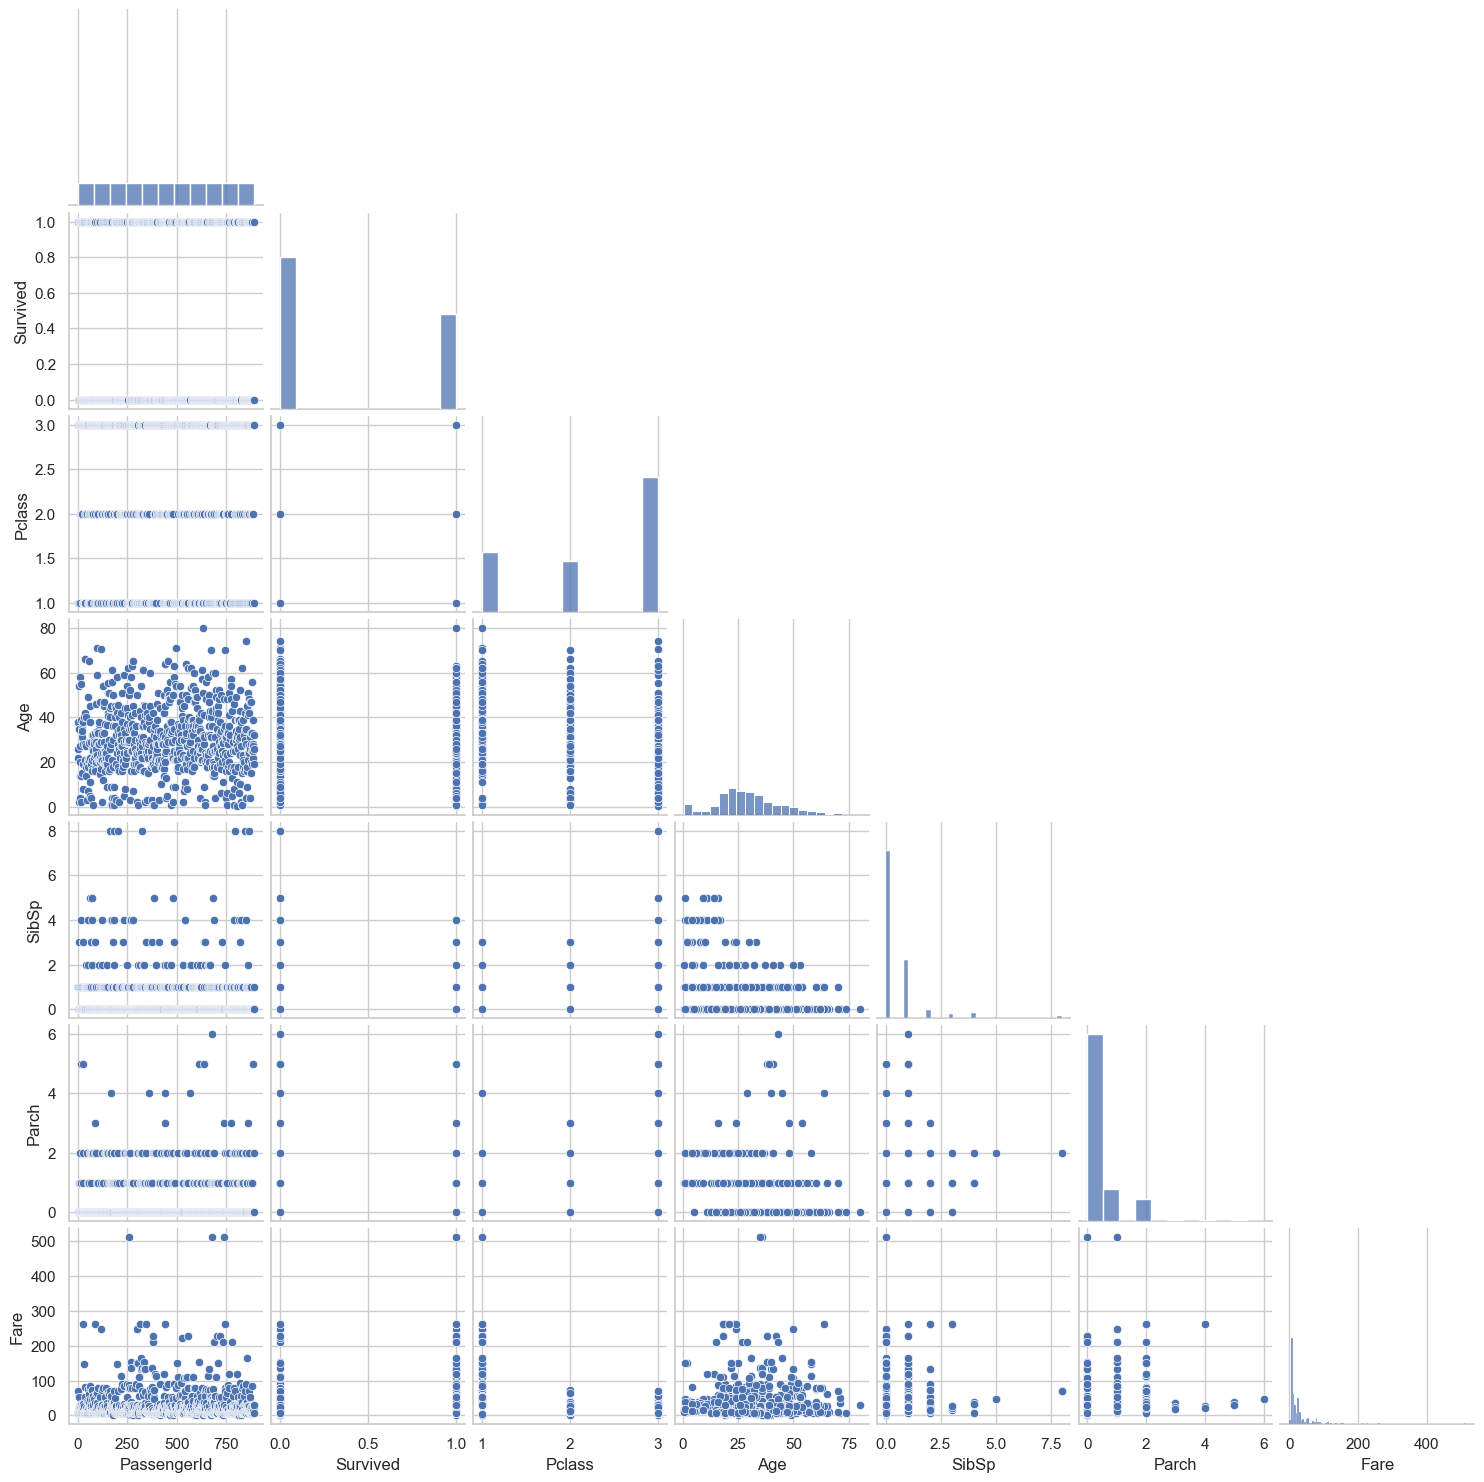

In [78]:
sns.set(style="whitegrid")

pair = sns.pairplot(titanicdf, corner=True)
pair.fig.set_size_inches(15,15)


<AxesSubplot: >

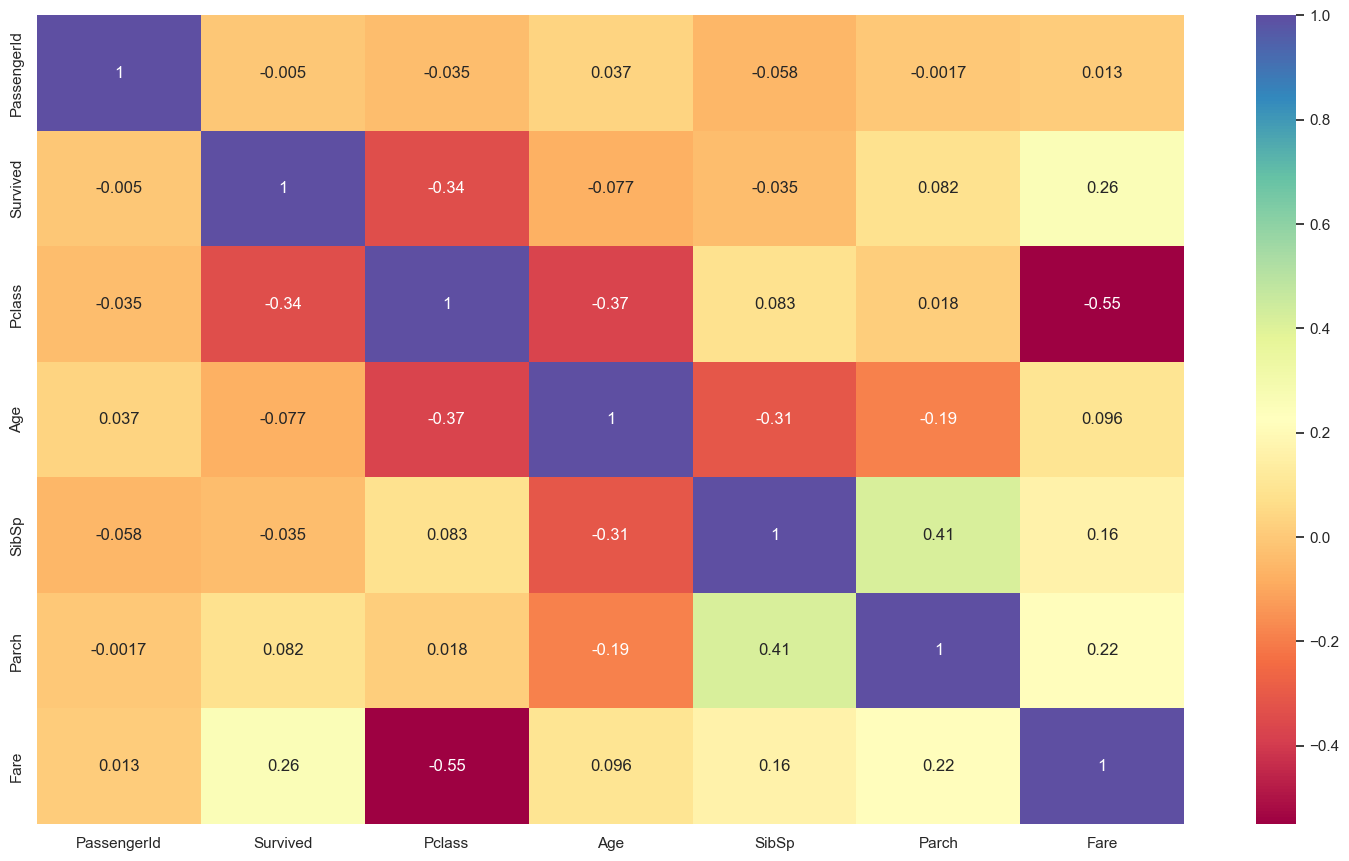

In [79]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

sns.heatmap(titanicdf.corr(numeric_only = True), cmap = 'Spectral', annot=True)


Notes:
Age, Sex, Class, Cabin? *Could be missing data, have an effect on the survival rate of the passenger / Does the name of the passenger matter?


## Feature Engineering, filling in missing values, extracting information, & more plots

#### Ended up dropping Sibsp, Parch, Embarked, Ticket, and Name after model construction

In [80]:
for column in titanicdf.keys():
    print(f'{column} Missing Values:{titanicdf[column].isnull().sum()}')

PassengerId Missing Values:0
Survived Missing Values:0
Pclass Missing Values:0
Name Missing Values:0
Sex Missing Values:0
Age Missing Values:177
SibSp Missing Values:0
Parch Missing Values:0
Ticket Missing Values:0
Fare Missing Values:0
Cabin Missing Values:687
Embarked Missing Values:2


In [81]:
#Fill in ages with the highest correlated value which is sex and class

titanicdf['Age'] = titanicdf['Age'].fillna(titanicdf.groupby(['Sex','Pclass'])['Age'].transform('mean'))

titanicdf.pivot_table('Age', 'Pclass')

,Age
Pclass,
1,38.378866
2,29.907295
3,25.112288


In [82]:
#Figuring out the ranges of value to determime which measure of center will be best-fit for the data *median

titanicdf.groupby(['Sex','Pclass'])['Age'].describe()

count       mean        std   min    25%        50%    75%  \
Sex    Pclass                                                               
female 1        94.0  34.611765  12.936648  2.00  24.00  34.611765  42.75   
       2        76.0  28.722973  12.699906  2.00  22.75  28.361486  36.00   
       3       144.0  21.750000  10.698425  0.75  18.00  21.750000  26.00   
male   1       122.0  41.281386  13.763246  0.92  33.25  41.281386  49.00   
       2       108.0  30.740707  14.158057  0.67  23.00  30.740707  36.00   
       3       347.0  26.507589  10.377158  0.42  21.00  26.507589  30.00   

                max  
Sex    Pclass        
female 1       63.0  
       2       57.0  
       3       63.0  
male   1       80.0  
       2       70.0  
       3       74.0

In [83]:
#Create a mask to figure out which embarked is null

titanicdf[titanicdf['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [84]:
#Google the names and found missing embarked data https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html & https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

titanicdf['Embarked'] = titanicdf['Embarked'].fillna('S')

titanicdf['Embarked'].isnull().sum()

0

In [85]:
#Missing Cabin Values was the trickiest in filling null values, decided to forward fill cabin category by class and then group by cabins
#ABC only have 1st class passengers, the rest were mixed between 1st and 2nd class passengers
titanicdf['Cabin'] = titanicdf['Cabin'].str.get(0)
titanicdf['Cabin'] = titanicdf.groupby('Pclass')['Cabin'].ffill().fillna('B')

titanicdf['Cabin'] = titanicdf['Cabin'].replace(['A','B','C'], 'ABC')
titanicdf['Cabin'] = titanicdf['Cabin'].replace(['D','E', 'F','G'], 'DEFG')

titanicdf.isnull().sum()
print(titanicdf['Cabin'].value_counts())


DEFG    728
ABC     162
T         1
Name: Cabin, dtype: int64


In [86]:
#Remove the singular T column

titanicdf = titanicdf.drop(titanicdf[titanicdf['Cabin'] == 'T'].index)

print(titanicdf['Cabin'].value_counts())


DEFG    728
ABC     162
Name: Cabin, dtype: int64


In [87]:
titanicdf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,ABC,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,ABC,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,ABC,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,ABC,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,ABC,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,ABC,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,DEFG,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,ABC,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,ABC,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,ABC,C


<AxesSubplot: xlabel='Fare', ylabel='Count'>

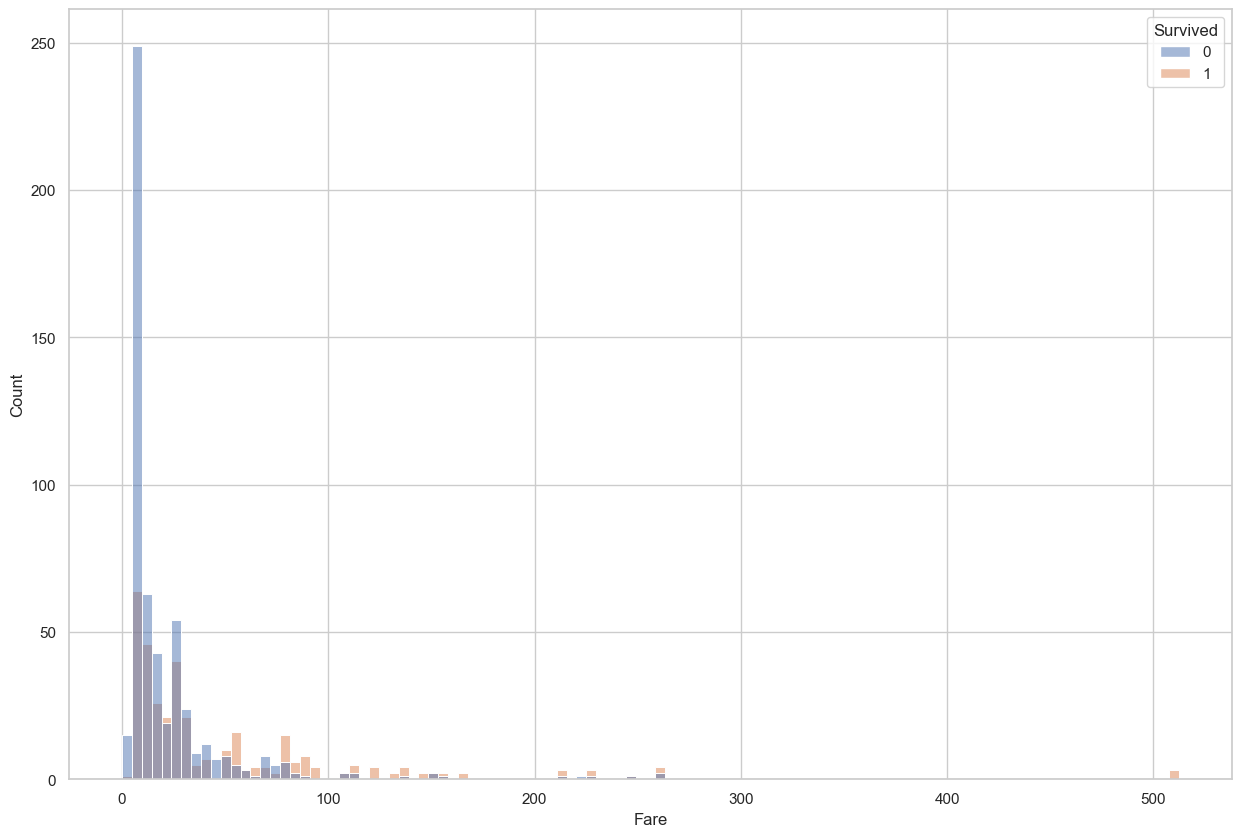

In [88]:
#Noticeably large right skew in fare data
sns.histplot(x='Fare', hue='Survived', data=titanicdf)



<AxesSubplot: xlabel='Fare', ylabel='count'>

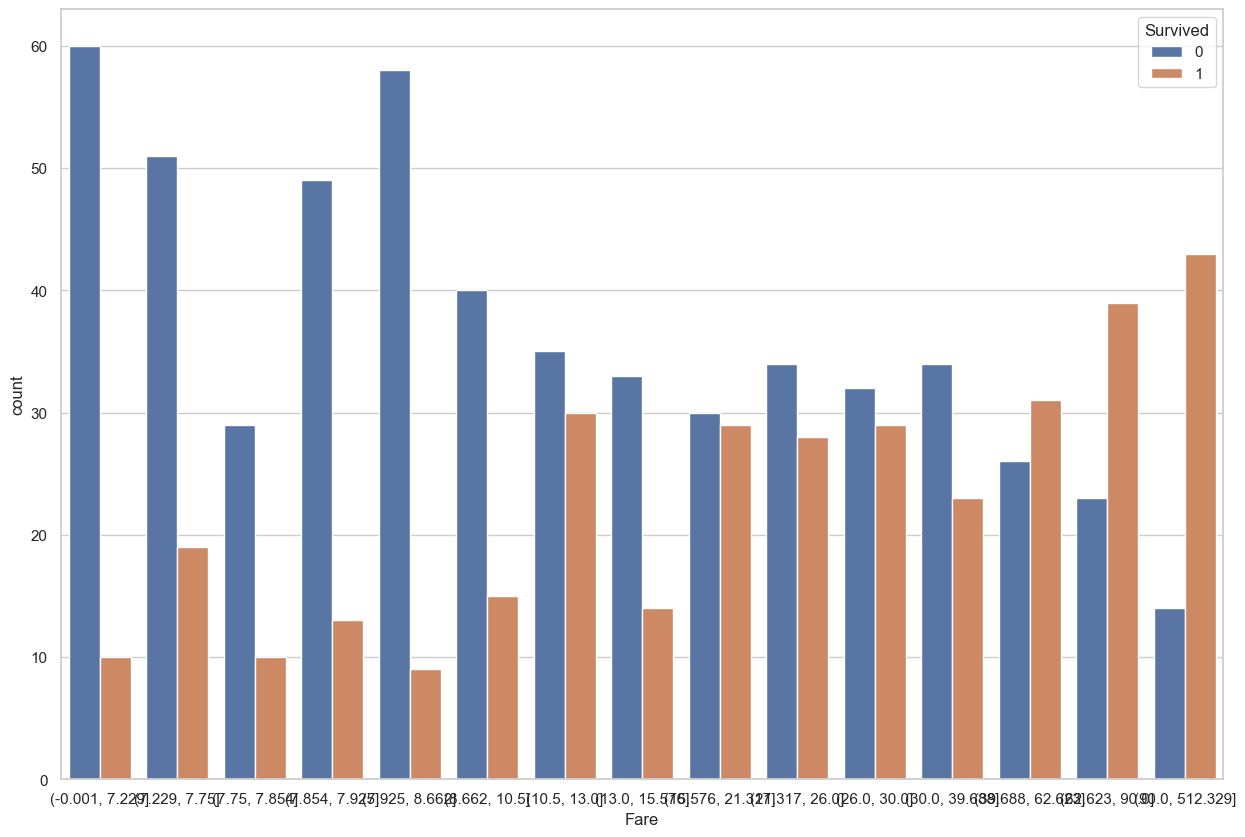

In [89]:
#Create bins to normalize skew & prevent overfitting
titanicdf['Fare'] = pd.qcut(titanicdf['Fare'], 15)

sns.countplot(x='Fare', hue='Survived', data=titanicdf)


<AxesSubplot: xlabel='Age', ylabel='count'>

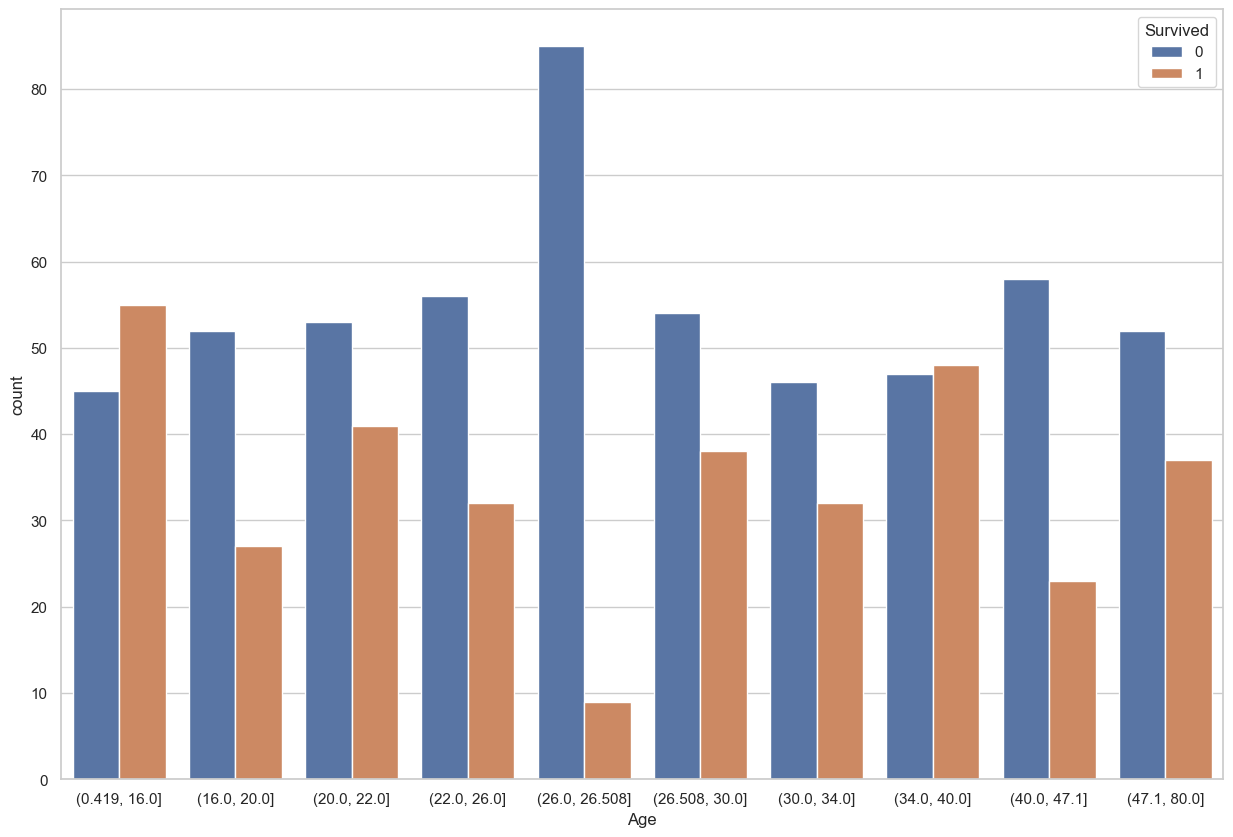

In [90]:
#Age has a standard distribution, but since I binned fare, not binning age will cause errors when applying Standard Scalar
titanicdf['Age'] = pd.qcut(titanicdf['Age'], 10)


sns.countplot(x='Age', hue = 'Survived', data = titanicdf)

In [91]:
#Drop the data not being used in the models
titanicdf = titanicdf.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)

In [92]:
titanicdf.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,"(20.0, 22.0]","(7.229, 7.75]",ABC,S
1,1,1,female,"(34.0, 40.0]","(62.623, 90.0]",ABC,C
2,1,3,female,"(22.0, 26.0]","(7.854, 7.925]",ABC,S
3,1,1,female,"(34.0, 40.0]","(39.688, 62.623]",ABC,S
4,0,3,male,"(34.0, 40.0]","(7.925, 8.662]",ABC,S
5,0,3,male,"(26.0, 26.508]","(7.925, 8.662]",ABC,Q
6,0,1,male,"(47.1, 80.0]","(39.688, 62.623]",DEFG,S
7,0,3,male,"(0.419, 16.0]","(15.576, 21.317]",ABC,S
8,1,3,female,"(26.508, 30.0]","(10.5, 13.0]",ABC,S
9,1,2,female,"(0.419, 16.0]","(30.0, 39.688]",ABC,C


In [93]:
#Convert Nominal Features into Ordinal Features
nominal_features = ['Sex', 'Fare', 'Cabin', 'Age', 'Embarked']

for features in nominal_features:
    titanicdf[features] = LabelEncoder().fit_transform(titanicdf[features])

titanicdf.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,1,2,1,0,2
1,1,1,0,7,13,0,0
2,1,3,0,3,3,0,2
3,1,1,0,7,12,0,2
4,0,3,1,7,4,0,2
5,0,3,1,4,4,0,1
6,0,1,1,9,12,1,2
7,0,3,1,0,8,0,2
8,1,3,0,5,6,0,2
9,1,2,0,0,11,0,0


In [94]:
#OneHotEncode the Ordinal Features
ordinal_features = ['Sex','Cabin','Pclass', 'Embarked']

encodeddf = []

for feature in ordinal_features:
    encodedfeature = OneHotEncoder().fit_transform(titanicdf[feature].values.reshape(-1, 1)).toarray()
    n_encoded = titanicdf[feature].nunique()
    colnames = [f'{feature} {n}' for n in range(1, n_encoded+1)]
    encodedfeaturedf = pd.DataFrame(encodedfeature, columns=colnames)
    encodeddf.append(encodedfeaturedf)

titanicdf = pd.concat([titanicdf, *encodeddf[:4]], axis=1)

titanicdf = titanicdf.drop(ordinal_features, axis = 1)




In [95]:
titanicdf = titanicdf.dropna()

In [96]:
titanicdf.head()

,Survived,Age,Fare,Sex 1,Sex 2,Cabin 1,Cabin 2,Pclass 1,Pclass 2,Pclass 3,Embarked 1,Embarked 2,Embarked 3
0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,7.0,13.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,7.0,12.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,7.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [97]:
titanicdf.to_csv('titanic_train.csv')

## Wooooo, feature engineering is over, time to move onto making models

## Post-Processing Graphs --------------------------------


In [98]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})

#Dataset Used
titanicdf = pd.read_csv(r'train.csv')

titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
#Convert Pclass ordinal to nominal
titanicdf['Pclass'] = titanicdf['Pclass'].replace(1, 'First Class')
titanicdf['Pclass'] = titanicdf['Pclass'].replace(2, 'Middle Class')
titanicdf['Pclass'] = titanicdf['Pclass'].replace(3, 'Lower Class')

In [100]:
#Convert Different Cabins to Main Cabin Letter

titanicdf['Cabin'] = titanicdf['Cabin'].str.get(0)
titanicdf = titanicdf.sort_values(by=['Cabin'])

In [101]:
#Retrieving the Names

titanicdf['Name'].values

array(['Clifford, Mr. George Quincy', 'Smith, Mr. James Clinch',
       'Blank, Mr. Henry', 'Dodge, Master. Washington',
       'Simonius-Blumer, Col. Oberst Alfons',
       'Barkworth, Mr. Algernon Henry Wilson',
       'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
       'Ross, Mr. John Hugo', 'Andrews, Mr. Thomas Jr',
       'Smith, Mr. Richard William', 'Goldschmidt, Mr. George B',
       'Rood, Mr. Hugh Roscoe', 'Sloper, Mr. William Thompson',
       'Roebling, Mr. Washington Augustus II',
       'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
       'Brown, Mrs. James Joseph (Margaret Tobin)',
       'Ryerson, Miss. Emily Borie', 'Lurette, Miss. Elise',
       'Madill, Miss. Georgette Alexandra',
       'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)',
       'Cardeza, Mr. Thomas Drake Martinez', 'Davidson, Mr. Thornton',
       'Carter, Mr. William Ernest', 'Butt, Major. Archibald Willingham',
       'Bishop, Mrs. Dickinson H (Helen Walton)',
       'Frol

<AxesSubplot: xlabel='Age', ylabel='Density'>

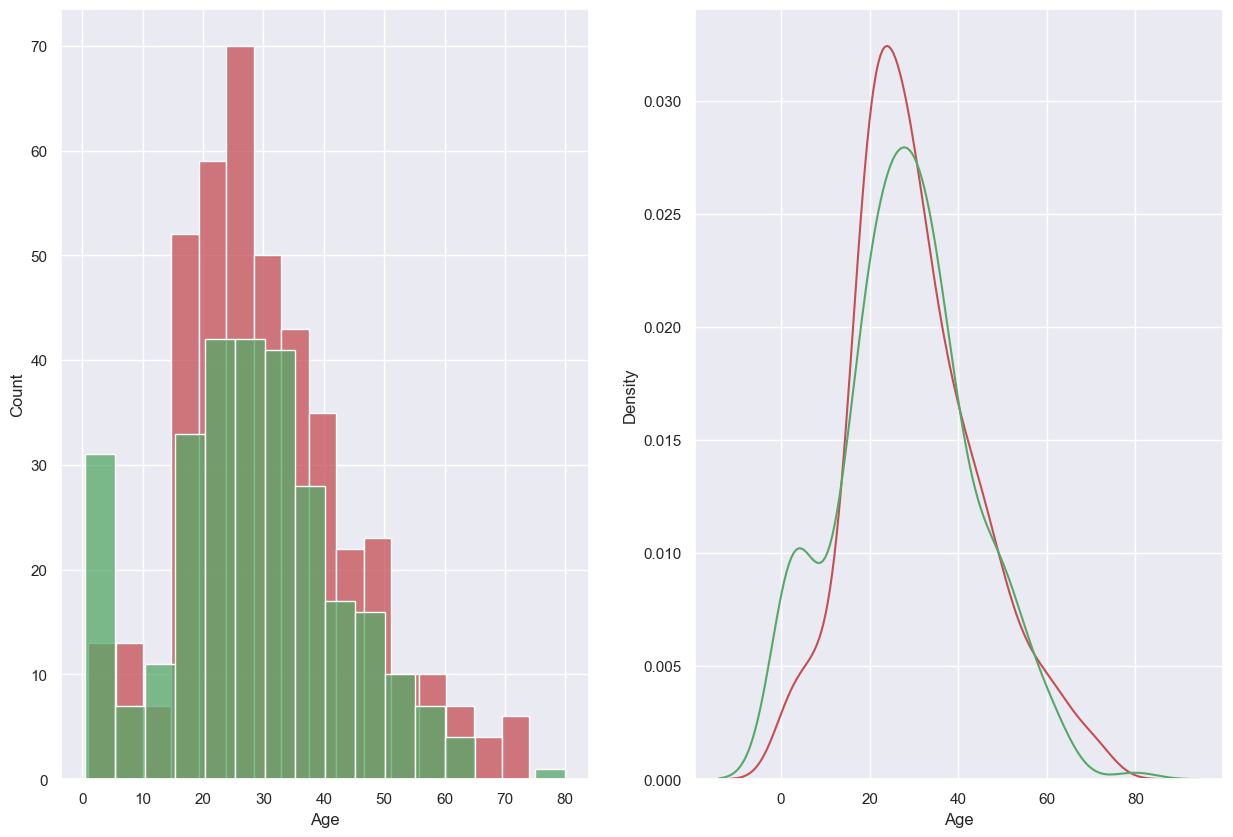

In [102]:
fig, ax = plt.subplots(ncols=2)

sns.histplot(titanicdf[titanicdf['Survived'] == 0]['Age'], ax = ax[0], color = 'r')
sns.histplot(titanicdf[titanicdf['Survived'] == 1]['Age'], ax = ax[0], color = 'g')

sns.kdeplot(titanicdf[titanicdf['Survived'] == 0]['Age'], color = 'r')
sns.kdeplot(titanicdf[titanicdf['Survived'] == 1]['Age'], ax = ax[1], color = 'g')

<AxesSubplot: xlabel='Fare', ylabel='Count'>

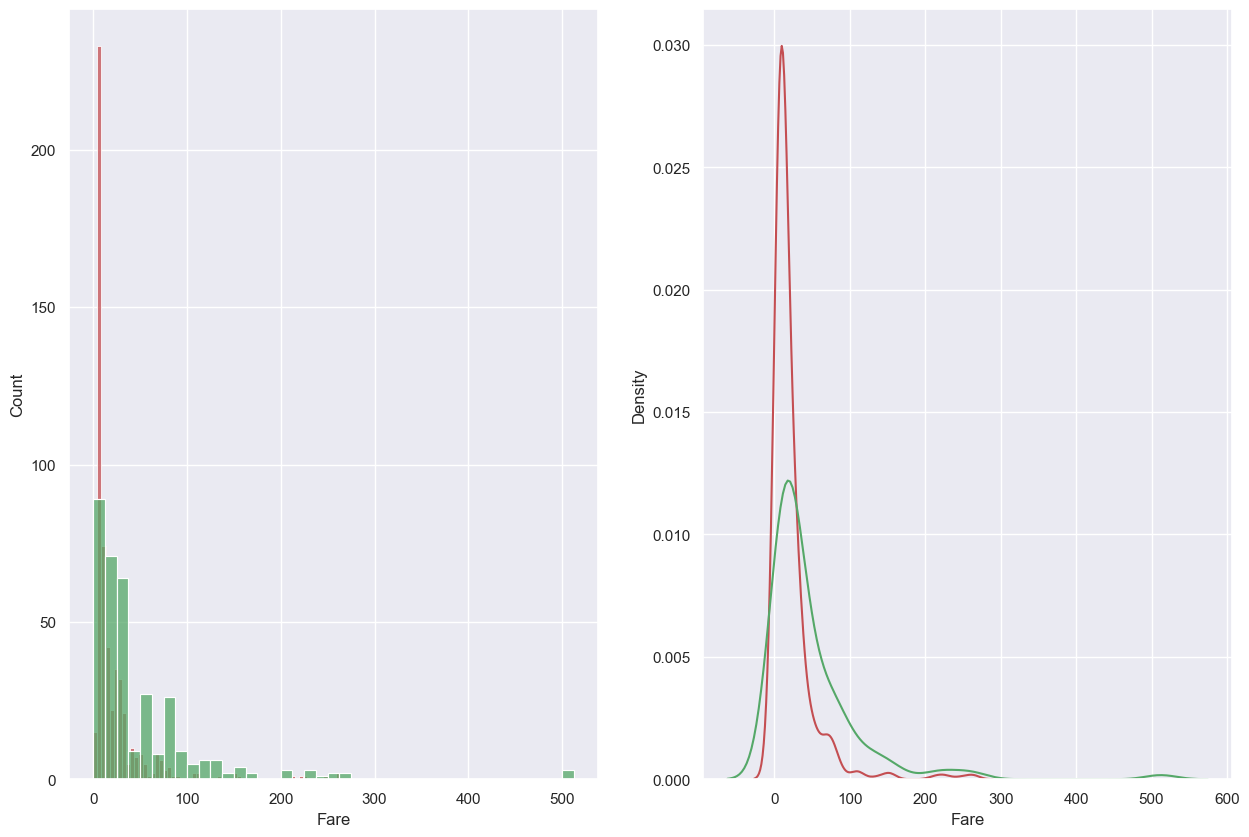

In [103]:
fig, ax = plt.subplots(ncols=2)

sns.kdeplot(titanicdf[titanicdf['Survived'] == 0]['Fare'], ax = ax[1], color = 'r')
sns.kdeplot(titanicdf[titanicdf['Survived'] == 1]['Fare'], ax = ax[1], color = 'g')


sns.histplot(titanicdf[titanicdf['Survived'] == 0]['Fare'], ax = ax[0], color = 'r')
sns.histplot(titanicdf[titanicdf['Survived'] == 1]['Fare'], ax = ax[0], color = 'g')


<AxesSubplot: xlabel='Parch', ylabel='count'>

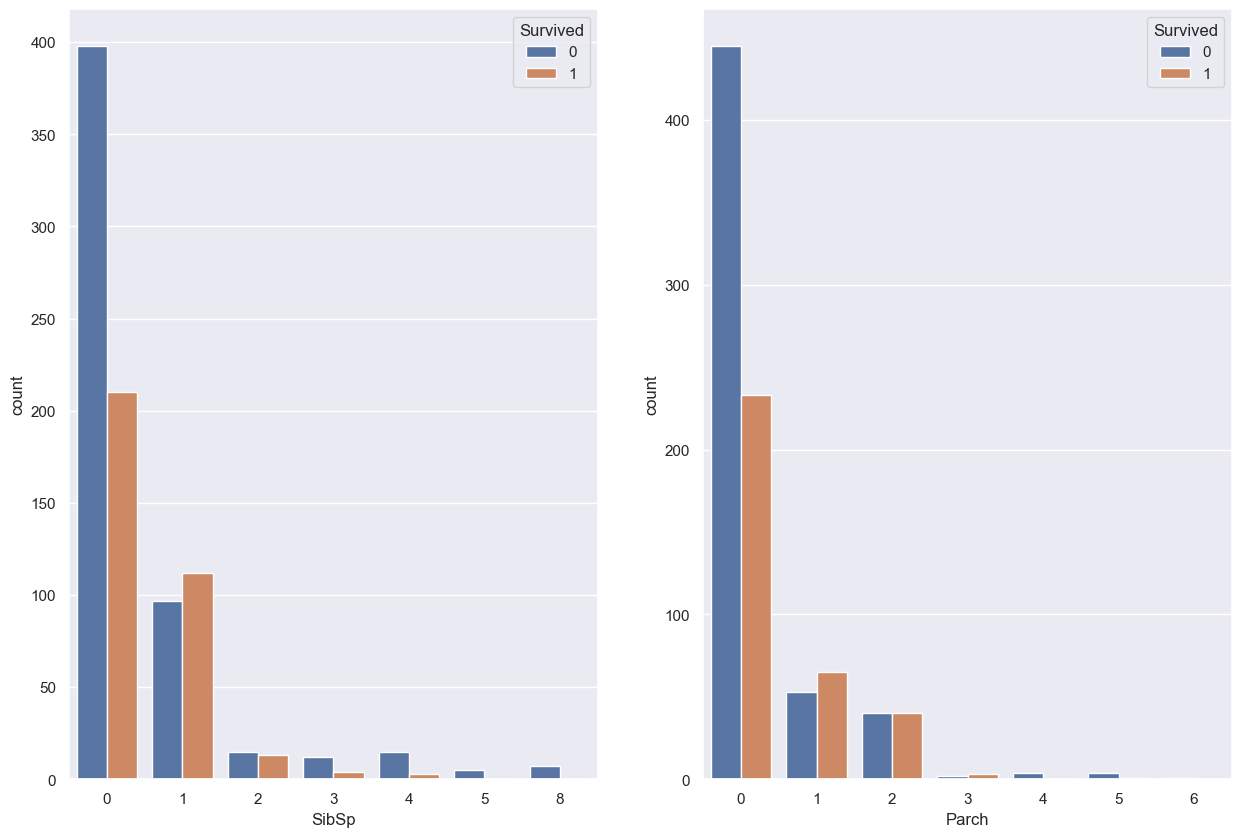

In [104]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x='SibSp', hue='Survived', data=titanicdf, ax = ax[0])

sns.countplot(x='Parch', hue='Survived', data=titanicdf, ax = ax[1])


<AxesSubplot: xlabel='Pclass', ylabel='count'>

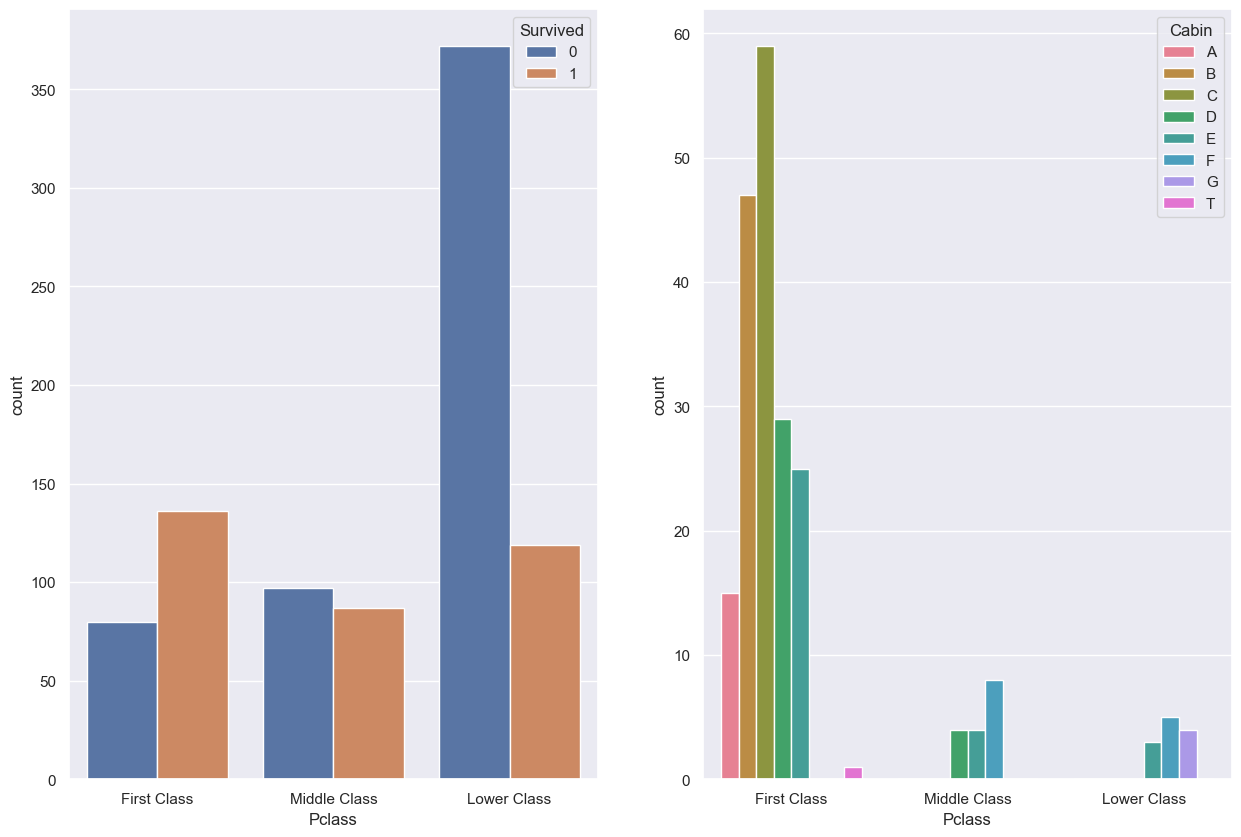

In [105]:
fig, ax = plt.subplots(ncols=2)


classes = sns.countplot(x='Pclass', hue='Survived', data=titanicdf, ax = ax[0])

sns.countplot(x='Pclass', hue='Cabin', data=titanicdf, palette = "husl", ax = ax[1]) #Would like to add another layer to the plot for survival


<AxesSubplot: xlabel='Pclass', ylabel='count'>

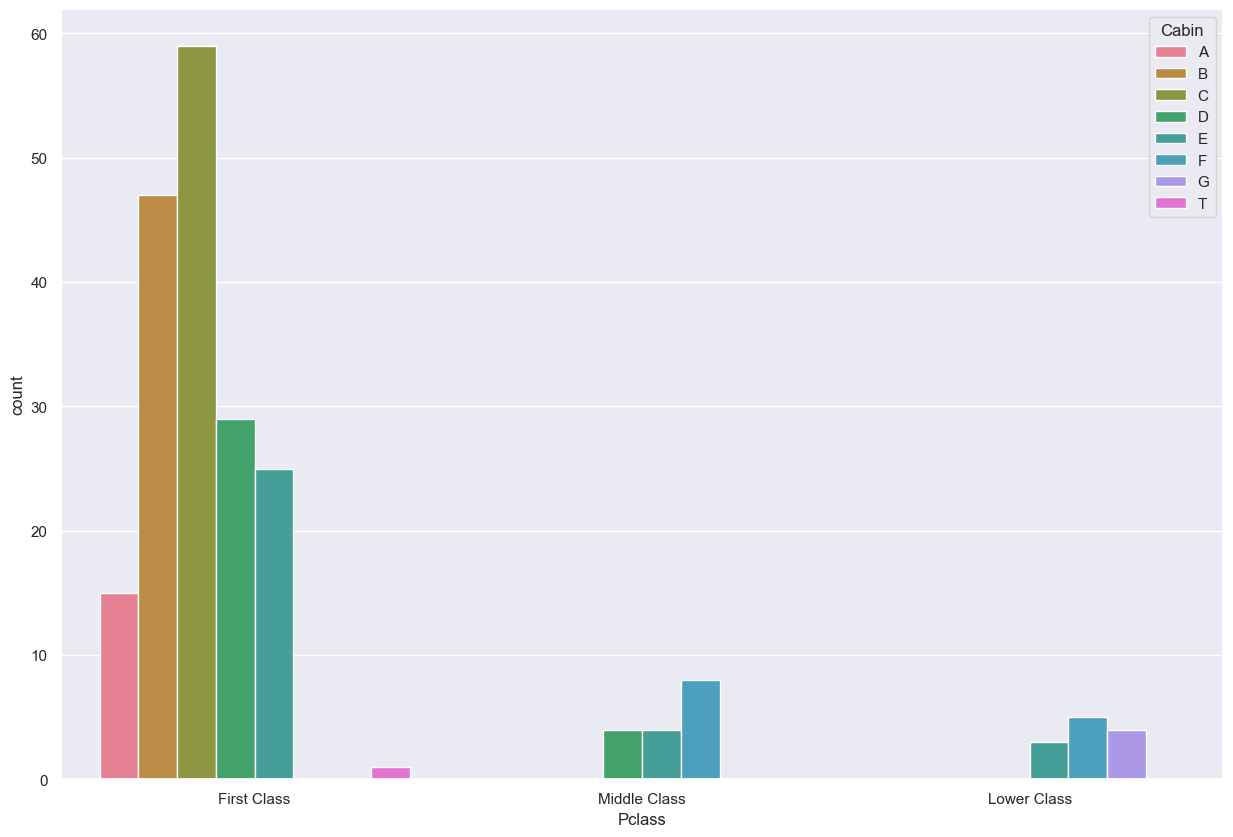

In [106]:


sns.countplot(x='Pclass', hue='Cabin', data=titanicdf, palette = "husl") #Would like to add another layer to the plot for survival


<AxesSubplot: xlabel='Age', ylabel='count'>

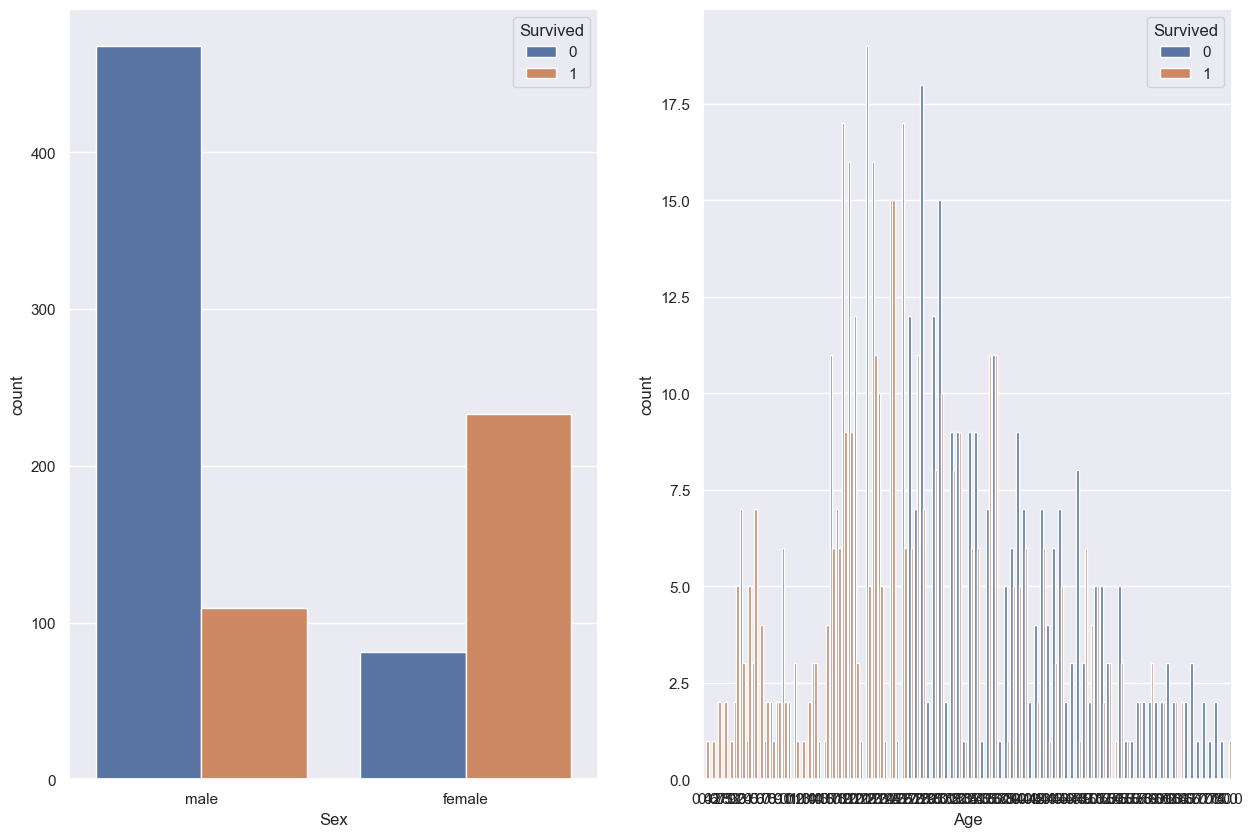

In [107]:
fig, ax = plt.subplots(ncols=2)


sns.countplot(x='Sex', hue='Survived', data=titanicdf, ax = ax[0])

sns.countplot(x='Age', hue='Survived', data=titanicdf, ax = ax[1]) #Possibly a graph of survival by name i.e Servant, Officer, Col, Doctor, etc...


<AxesSubplot: >

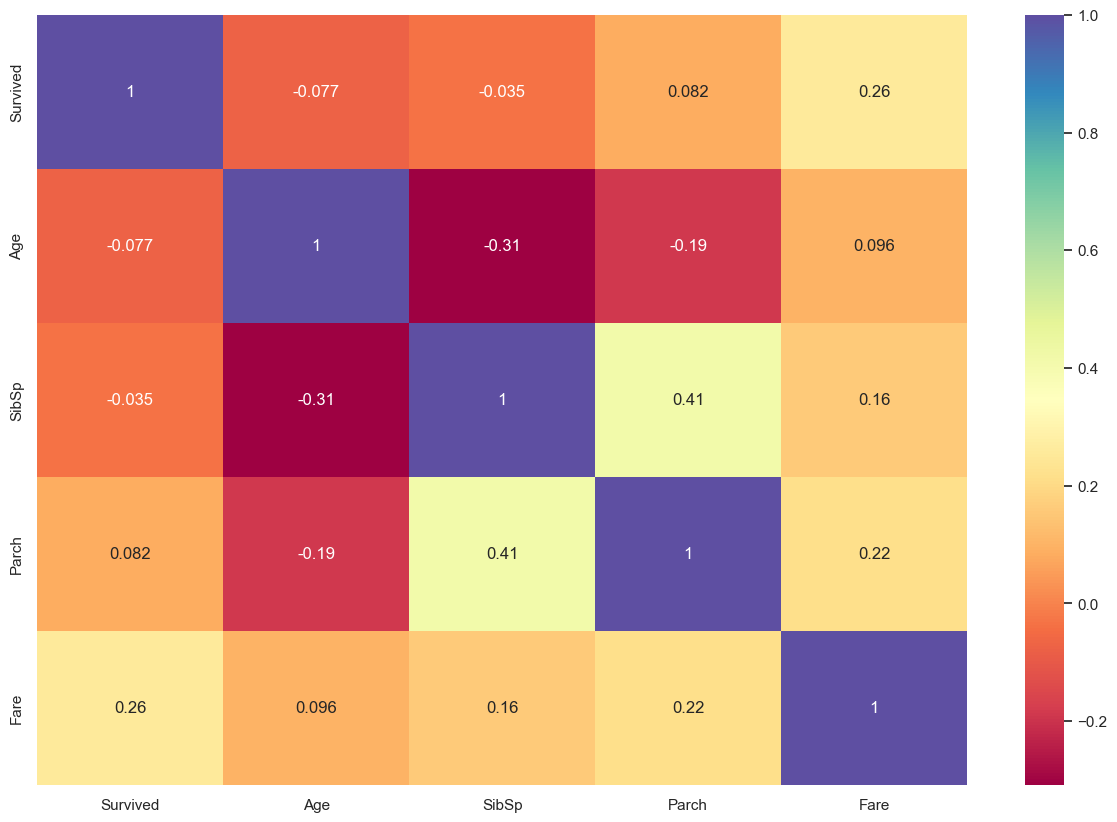

In [108]:
sns.heatmap(titanicdf.drop(["PassengerId"],axis=1).corr(numeric_only = True), cmap = 'Spectral', annot=True)

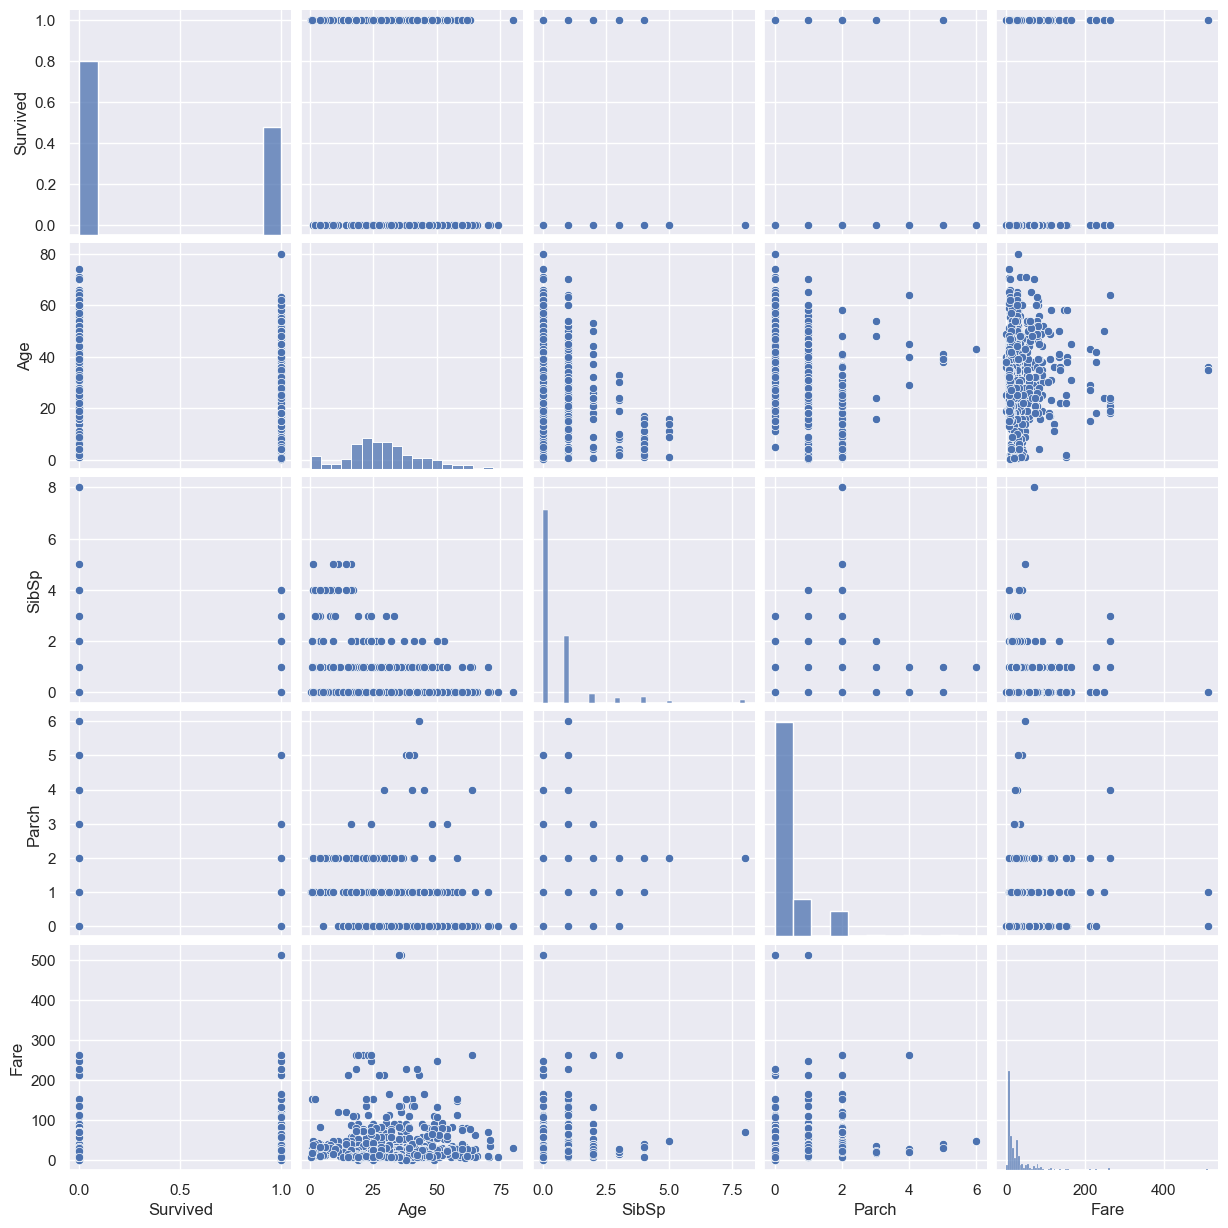

In [109]:

sns.pairplot(titanicdf.drop(["PassengerId"],axis=1))